## Исследование данных о российском кинопрокате



###### Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации.
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

###  Изучение данных из файлов и объединение их в один датафрейм. 

Импорт необходимых библиотек

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Открываем файлы и просматриваем их содержимое

In [2]:
df1 = pd.read_csv('/datasets/mkrf_movies.csv')
df2 = pd.read_csv('/datasets/mkrf_shows.csv')

#### Изучение общих данных в датфреймах

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
Столбцы
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.

Cтолбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

In [4]:
df1.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


Обнаружены следующие недочёты:
* `puNumber` - неверный тип данных, должен быть int вместо object;
* `film_studio` — обнаружены пропуски данных;
* `production_country` — обнаружены пропуски данных;
* `director` — обнаружены пропуски данных;
* `producer` — обнаружены пропуски данных;
* `ratings` — обнаружены пропуски данных;
* `genres` — обнаружены пропуски данных.

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

Столбцы:
* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

In [6]:
df2.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


* Проблем не обнаружено

##### Вывод

Таблица `mkrf_movies`:

Обнаружены следующие недочёты:
* `puNumber` - неверный тип данных, должен быть int, вместо object;
* `film_studio` — обнаружены пропуски данных;
* `production_country` — обнаружены пропуски данных;
* `director` — обнаружены пропуски данных;
* `producer` — обнаружены пропуски данных;
* `ratings` — неверный тип данных, должен быть float, вместо object.Так же обнаружены пропуски данных;
* `genres` — обнаружены пропуски данных.

Таблица `mkrf_shows`:

* Проблем не обнаружено

#### Объединение двух датафреймов в один

Сменим тип в столбце `puNumber` на int

In [7]:
df1['puNumber'] = pd.to_numeric(df1['puNumber'], errors='coerce')
df1[ df1['puNumber'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


* Одна строка с некорректным значением, удалим её

In [8]:
df1 = df1.dropna(subset=['puNumber'])
df1['puNumber'] = df1['puNumber'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
title                    7485 non-null object
puNumber                 7485 non-null int64
show_start_date          7485 non-null object
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 935.6+ KB


Объеденим две таблицы в одну, по столбцу 'puNumber'(прокатный номер), и исправим имя столбца puNumber на pu_number

In [9]:
df = df1.merge(df2, on='puNumber', how='left')
df = df.rename(columns={"puNumber": "pu_number"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
pu_number                7485 non-null int64
show_start_date          7485 non-null object
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 994.1+ KB


In [10]:
df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


##### Вывод

* Датафреймы объединены

#### Анализ данных по столбца

In [11]:
df['type'].value_counts()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

* Обнаружены не явные дубликаты. Нужно удалить пробелы и перенести 'Музыкально-развлекательный жанр' в 'Прочие', так как есть всего один такой фильм 

In [12]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

* Проблем не обнаружено

In [13]:
df['refundable_support'].value_counts()

0.0            221
20000000.0      12
25000000.0      10
10000000.0      10
15000000.0       9
5000000.0        9
50000000.0       8
40000000.0       8
30000000.0       7
60000000.0       6
100000000.0      5
110000000.0      2
55000000.0       2
75000000.0       2
19000000.0       2
115000000.0      1
8000000.0        1
7346881.0        1
44000000.0       1
28000000.0       1
7153119.0        1
26000000.0       1
41000000.0       1
17000000.0       1
150000000.0      1
36000000.0       1
38000000.0       1
180000000.0      1
9000000.0        1
3500000.0        1
35000000.0       1
80000000.0       1
29000000.0       1
7000000.0        1
Name: refundable_support, dtype: int64

* Необходимо заменить тип c вещественного на целые числа

In [14]:
df['nonrefundable_support'].value_counts()

25000000.0     53
30000000.0     48
35000000.0     29
40000000.0     26
20000000.0     19
               ..
3000000.0       1
51000000.0      1
22904000.0      1
50000866.0      1
140000000.0     1
Name: nonrefundable_support, Length: 75, dtype: int64

* Необходимо заменить тип c вещественного на целые числа

In [15]:
df['budget'].value_counts()

0.0           17
38000000.0     6
80000000.0     4
50000000.0     4
37142857.0     3
              ..
74071918.0     1
48571430.0     1
69883049.0     1
51196711.0     1
46923776.0     1
Name: budget, Length: 290, dtype: int64

* Необходимо заменить тип c вещественного на целые числа
* Нулевые значения необходимо удалить, бюджет не может равняться 0

In [16]:
df['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

* Проблем не обнаружено

In [17]:
df['box_office'].value_counts()

0.0           24
200.0         13
300.0         12
360.0          9
250.0          8
              ..
996669.0       1
8216845.0      1
39251.0        1
72937783.2     1
81000.0        1
Name: box_office, Length: 2938, dtype: int64

* Есть не корректные данные, суммы указана не реалистичные. Но не известно как исправлять данные, так как нет возможности связаться с создателем таблицы. Оставляем так как есть. Возможно пропущены 0, но не известно сколько.

Например:

Кунг-фу Панда  - 2 927 р., в реальности сборы в России - $31 832 221 (кинопоиск)

ШПИОН - 5 405 р., в реальности сборы в России - $7 946 957 (кинопоиск)

Время собирать цветы - 7 175 р. - документальный фильм длительностью 41 минута, скорее всего не показывался массово в кинотеатрах

#### Вывод

* Таблицы объеденены в один датафрейм

Обнаружены следующие недочёты:
* `type` — обнаружены не явные дубликаты;
* `film_studio` — обнаружены пропуски данных;
* `production_country` — обнаружены пропуски данных;
* `director` — обнаружены пропуски данных;
* `producer` — обнаружены пропуски данных;
* `refundable_support` — необходимо заменить тип c вещественного на целые числа;
* `nonrefundable_support` — необходимо заменить тип c вещественного на целые числа;
* `budget` — необходимо заменить тип c вещественного на целые числа, так же необходимо удалить 0 значения;
* `ratings` — неверный тип данных, должен быть float, вместо object. Так же обнаружены пропуски и не корректные данные;
* `genres` — обнаружены пропуски данных;
* `box_office` — Есть не корректные данные, суммы указана не реалистичные.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез, но встречаются пропуски и ошибки в данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

### Предобработка данных

#### Изучение и удаление пропусков в датафрейме

В столбцах 'film_studio', 'production_country', 'director', пропущенно минимальное кол-во значений, поэтому можно удалить строки с пропусками в данных столбцах так как они не значительно повлияют на размер выборки

In [18]:
df = df.dropna(subset=['film_studio', 'production_country', 'director'])

В столбце жанр, заменим пропуски на пустые значения

In [19]:
df['genres'] = df['genres'].fillna('unknown')

* Остальные пропуски оставим без изменений, так как их удаление может существенно повлиять на выборку и следовательно на само исследование.

#### Замена типа данных

Заменим тип данных с object на float, некорректные данные заменим на пропуски. Пропуски оставим без изменений.

In [20]:
df['ratings'] = pd.to_numeric(df1['ratings'], errors='coerce')

#### Изучение и удаление дубликатов в датафрейме

Удалим дубликаты в столбце 'type':
* удалим пробелы;
* перенесём 'Музыкально-развлекательный жанр' в 'Прочие', так как есть всего один такой фильм. 

In [21]:
df['type'] = df['type'].str.strip()
df.loc[df['type'] == "Музыкально-развлекательный", 'type'] = 'Прочие'
df['type'].value_counts()

Художественный       5897
Анимационный          829
Прочие                402
Документальный        280
Научно-популярный      50
Name: type, dtype: int64

#### Добавление новых столбцов

Создаём столбец с информацией о годе проката

In [22]:
df['year_rental'] = pd.DatetimeIndex(df['show_start_date']).year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [23]:
df['main_director'] = df.apply(lambda row: row['director'].split(',')[0], 1)
df['main_genres'] = df.apply(lambda row: row['genres'].split(',')[0], 1)

#### Провека количественные значения



Создаём новый датафрейм в который помещаем фильмы с государственной поддержкой 

In [24]:
df_state = df.query('refundable_support > 0 or nonrefundable_support > 0').copy()

Создаем столбец с суммарной государственной помощью

In [25]:
df_state['state_money'] = df_state['refundable_support'] + df_state['nonrefundable_support']

Заменим тип данных с float на int в столбцах: 'refundable_support', 'nonrefundable_support', 'budget'.

In [26]:
list1 = ['refundable_support', 'nonrefundable_support', 'budget']
for i in list1:
    df_state[i] = df_state[i].astype('int')

Удаляем фильмы с нулевым бюджетом, полный датафрейм сохраним для исследований

In [27]:
df_state_corr = df_state.query('budget != 0').copy()

Проверяем что бюджет фильмов выше чем государственная поддержка

In [28]:
df_state_corr.query('state_money >= budget').count().sum()

0

Добавим столбец с долей государственной поддержки от общего бюджета фильма.

In [29]:
try:
    df_state_corr['ratio_state'] = (df_state_corr['state_money'] / df_state_corr['budget']).round(2)
except:
    print('Ошибка, бюджет равен 0')

### Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год.

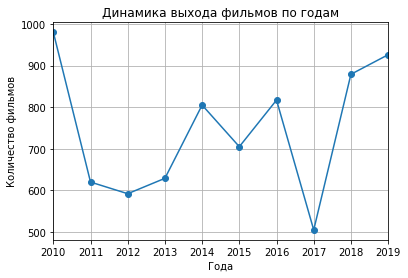

In [30]:
df.groupby('year_rental')['title'].count().plot(grid=True, style='-o')
plt.title('Динамика выхода фильмов по годам')
plt.xlabel('Года')
plt.ylabel('Количество фильмов')
plt.show()

* В 2010 и 2019 г. вышло больше всего фильмов в прокат - более 900 фильмов, в 2017 г. меньше всего - около 500 фильмов

In [31]:
print(f"Доля фильмов с информацией о прокате в Российских кинотеатрах: {df['box_office'].count()/df['title'].count():.2%}")

Доля фильмов с информацией о прокате в Российских кинотеатрах: 42.30%


Поместим в отдельный датафрейм фильм с информацией о прокате в Российских кинотеатрах и заменим в в столбце 'box_office', тип с float на int

In [32]:
df_box_office = df.query('box_office > 0').copy()
df_box_office['box_office'] = df_box_office['box_office'].astype('int')

Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

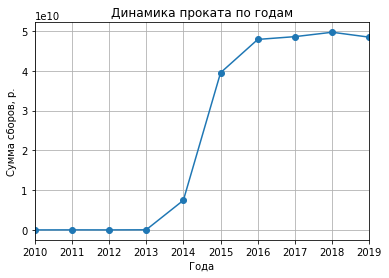

In [33]:
df_box_office.groupby('year_rental')['box_office'].sum().plot(grid=True, style='-o')
plt.title('Динамика проката по годам')
plt.xlabel('Года')
plt.ylabel('Сумма сборов, р.')
plt.show()

Похоже информация с 2010 по 2014 год вводилась не корректно, удалим информацию о этих годах из выборки, и построим график ещё раз

In [34]:
df_box_office = df_box_office.query('year_rental > 2014')

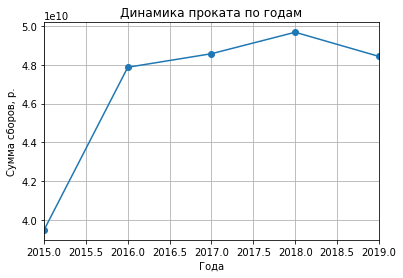

In [35]:
df_box_office.groupby('year_rental')['box_office'].sum().plot(grid=True, style='-o')
plt.title('Динамика проката по годам')
plt.xlabel('Года')
plt.ylabel('Сумма сборов, р.')
plt.show()

В 2015 году были минимальные сборы в районе 4 млрд. р., а в 2018 г. - максимальные сборы, около 5 млрд. р.

Посчитаем среднюю и медианную сумму сборов для каждого года.

In [36]:
df_box_office.groupby('year_rental')['box_office'].describe().loc[:,['mean', '50%']]

,mean,50%
year_rental,,
2015,8.549213e+07,5003449.5
2016,9.134753e+07,3957926.0
2017,1.360328e+08,9968340.0
2018,1.047856e+08,8911533.5
2019,9.136926e+07,4627798.0


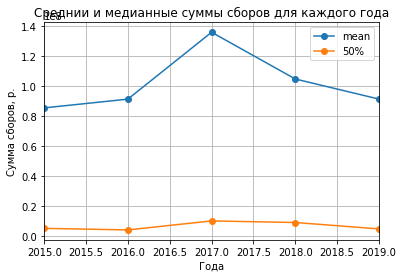

In [37]:
df_box_office.groupby('year_rental')['box_office'].describe().loc[:,['mean', '50%']].plot(grid=True, style='-o')
plt.title('Среднии и медианные суммы сборов для каждого года')
plt.xlabel('Года')
plt.ylabel('Сумма сборов, р.')
plt.show()

* Медианные и средние значения очень сильно отличаются, скорее всего есть выбивающиеся значения
* В 2017 г. была самая высокая средняя и медианная сумма сборов, 136 млн. и 9,9 млн. соответственно, в 2016 и 2019 г. самая низкая

Определим влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Меняется ли картина в зависимости от года.

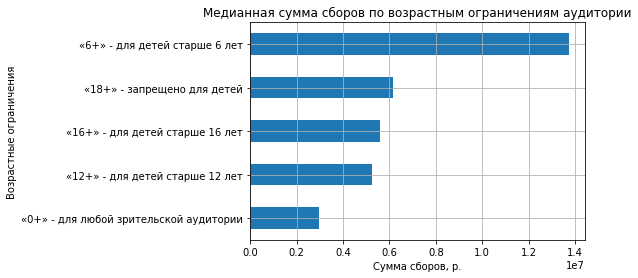

In [38]:
df_box_office.groupby('age_restriction')['box_office'].median().plot(kind='barh', grid=True)
plt.title('Медианная сумма сборов по возрастным ограничениям аудитории')
plt.xlabel('Сумма сборов, р.')
plt.ylabel('Возрастные ограничения')
plt.show()

* Меньше всего медианная сумма сборов у фильмов с возрастным ограничением "0+" (3 млн. р.), больше всего у фильмов с возрастным ограничением "6+" (14 млн. р.)

Посмотрим меняется ли картина в зависимости от года

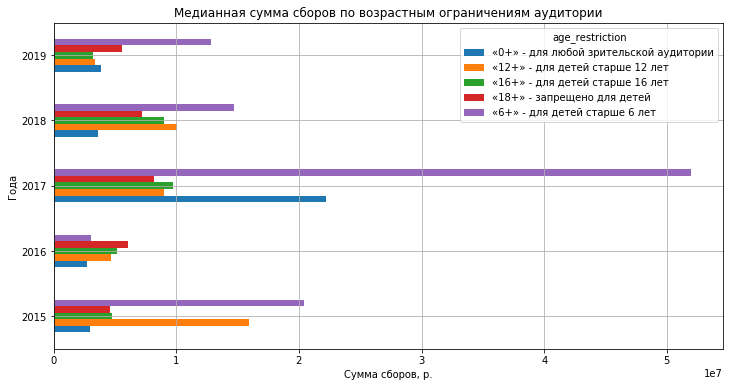

In [39]:
df_box_office.pivot_table(index='year_rental', columns='age_restriction', values='box_office', aggfunc='median').plot(
        kind='barh', grid=True, figsize=(12,6)
)
plt.title('Медианная сумма сборов по возрастным ограничениям аудитории')
plt.xlabel('Сумма сборов, р.')
plt.ylabel('Года')
plt.show()

* фильмы с возрастным ограничением "0+", во все года, кроме 2017 года, показали наименьшие суммы сборов;
* фильмы с возрастным ограничением "6+", во все года, кроме 2016 года, показали наибольшие суммы сборов;
* меняющееся картина по возрастным ограничениям, в некоторые года, может быть связана с выходом кассовых фильмов в данных возрастных рамках; 

### Исследование фильмов, которые получили государственную поддержку

Посчитаем какая сумму была выделена государством на поддержку кино, с 2013 по 2019 год.

In [40]:
df_state['state_money'].sum()

20200688312.0

Построим график суммы государственной поддержки по годам

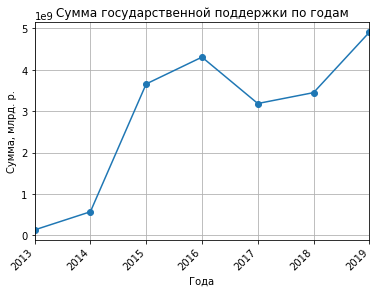

In [41]:
df_state.groupby('year_rental')['state_money'].sum().plot(grid=True, style='-o')
plt.title('Сумма государственной поддержки по годам')
plt.xlabel('Года')
plt.ylabel('Сумма, млрд. р.')
plt.xticks(rotation = 45, ha='right')
plt.show()

* сумма государственной поддержки была низкой в 2013  и 2014 год - менее 1 млрд. р.
* в 2015 г., государственная поддержка резко выросла и составила 3,6 млрд. р.
* в 2019 г., государственная поддержка достигла своего пика - 5 млрд. р. 

In [42]:
df_state_corr_box_office = df_state_corr.query('box_office > 0').copy()

In [43]:
df_state_corr_box_office['payback'] = (df_state_corr_box_office['box_office'] / df_state_corr_box_office['budget'])

In [44]:
df_state_corr_box_office[['budget', 'box_office', 'payback', 'state_money', 'ratio_state', 'ratings']].describe()

,budget,box_office,payback,state_money,ratio_state,ratings
count,3.010000e+02,3.010000e+02,301.000000,3.010000e+02,301.000000,241.00000
mean,1.348378e+08,1.306983e+08,0.763310,5.953222e+07,0.516777,6.09834
std,1.891407e+08,3.391903e+08,1.672880,6.988684e+07,0.169733,1.18845
min,1.446246e+07,1.550000e+03,0.000017,4.700000e+06,0.040000,2.90000
25%,4.616000e+07,1.067649e+06,0.022548,2.590000e+07,0.370000,5.40000
50%,7.500014e+07,1.274840e+07,0.148664,3.500000e+07,0.590000,6.20000
75%,1.542457e+08,1.031348e+08,0.783883,6.000000e+07,0.660000,7.00000
max,2.305074e+09,3.073569e+09,19.209804,5.000000e+08,0.780000,8.70000


In [45]:
df['ratings'].median()

6.6

* Медианная окупаемость фильмов очень низкая - сборы принесли лишь 15% от затраченных средств на производство фильма;
* Медианный рейтинг фильмов составил 6,2 - это довольно низкий показатель, медианный рейтинг по всей выборке составил 6,6;
* Государственная помощь составила 59% (медианное значение) от общего бюджета.

Посмотрим фильмы с какой возрастной группой больше поддерживаются государством

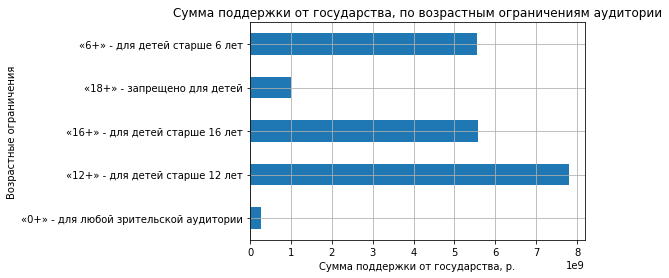

In [46]:
df_state.groupby('age_restriction')['state_money'].sum().plot(kind='barh', grid=True)
plt.title('Сумма поддержки от государства, по возрастным ограничениям аудитории')
plt.xlabel('Сумма поддержки от государства, р.')
plt.ylabel('Возрастные ограничения')
plt.show()

* больше всего государством поддерживаются фильмы с возрастным ограничением "12+", на такие фильмы выделенно около 8 млрд. р., меньше всего на фильмы с возрастным ограничением "0+" - выделено 200 млн. р.

Посмотрим на сборы фильмов с поддержкой государства, по возрастным категориям.

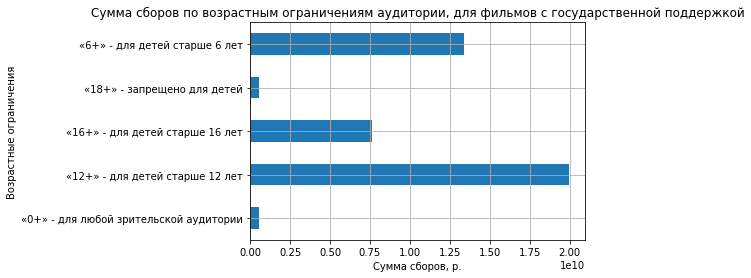

In [47]:
df_state.groupby('age_restriction')['box_office'].sum().plot(kind='barh', grid=True)
plt.title('Сумма сборов по возрастным ограничениям аудитории, для фильмов с государственной поддержкой')
plt.xlabel('Сумма сборов, р.')
plt.ylabel('Возрастные ограничения')
plt.show()

* Больше всего собрали фильмы с возрастным ограничением "12+" - 20 млрд. р., меньше всего фильмы с возрастным ограничением "0+" и "18+" - менее 1 млрд. р.

Посмотрим топ-10 окупаемых фильмов, с государственной поддержкой

In [48]:
df_state_corr_box_office.pivot_table(index='title', values='payback').sort_values(
    by='payback', ascending=False
).head(10)

,payback
title,
Холоп,19.209804
Лёд,9.729984
Я худею,7.227251
"Гуляй, Вася !",6.643566
Самый Лучший День,5.229157
8 новых свиданий,5.081857
Ёлки Новые,4.905618
Непрощенный,4.767206
Движение вверх,4.709798


Посмотрим топ-10 фильмов с самым высоким рейтингом, с государственной поддержкой

In [49]:
df_state_corr_box_office.pivot_table(index='title', values='ratings').sort_values(
    by='ratings', ascending=False
).head(10)

,ratings
title,
Зоология,8.7
Проигранное место,8.6
Две женщины,8.5
Чистое искусство.,8.2
Подкидыш,8.2
Волки и Овцы: Ход Свиньей,8.1
Пока еще жива,8.1
Блокбастер,8.0
Новогодний ремонт,8.0


### Общий вывод

Выводы по выборке в целом:

* в 2010 и 2019 г. вышло больше всего фильмов в прокат - более 900 фильмов, в 2017 г. меньше всего - около 500 фильмов;
* доля фильмов с информацией о прокате в Российских кинотеатрах: 42.30%;
* в 2015 году были минимальные сборы в районе 4 млрд. р., а в 2018 г. - максимальные сборы, около 5 млрд. р.;
* медианные и средние значения суммы сборов для каждого года, очень сильно отличаются, скорее всего есть выбивающиеся значения;
* в 2017 г. была самая высокая средняя и медианная сумма сборов, 136 млн. и 9,9 млн. соответственно, в 2016 и 2019 г. самая низкая;
*  меньше всего медианная сумма сборов у фильмов с возрастным ограничением "0+" (2 млн. р.), больше всего у фильмов с возрастным ограничением "6+" (14 млн. р.);
* фильмы с возрастным ограничением "0+", во все года, кроме 2017 года, показали наименьшие суммы сборов;
* фильмы с возрастным ограничением "6+", во все года, кроме 2016 года, показали наибольшие суммы сборов;
* меняющееся картина по возрастным ограничениям, в некоторые года, может быть связана с выходом кассовых фильмов в данных возрастных рамках; 

Выводы по фильмам с государственной поддержкой:

* 20,2 млрд. р. выделило государство на поддержку кино, с 2013 по 2019 год.
* сумма государственной поддержки была низкой в 2013  и 2014 год - менее 1 млрд. р.
* в 2015 г., государственная поддержка резко выросла и составила 3,6 млрд. р.
* в 2019 г., государственная поддержка достигла своего пика - 5 млрд. р. 
* медианная окупаемость фильмов очень низкая - сборы принесли лишь 15% от затраченных средств на производство фильма;
* медианный рейтинг фильмов составил 6,2 - это довольно низкий показатель, медианный рейтинг по всей выборке составил 6,6;
* государственная помощь составила 59% (медианное значение) от общего бюджета;
* больше всего государством поддерживаются фильмы с возрастным ограничением "12+", на такие фильмы выделенно около 8 млрд. р., меньше всего на фильмы с возрастным ограничением "0+" - выделено 200 млн. р.;
* Больше всего собрали фильмы с возрастным ограничением "12+" - 20 млрд. р., меньше всего фильмы с возрастным ограничением "0+" и "18+" - менее 1 млрд. р.;
* топ 3 фильмов по окупаемости: Холоп - принёс в 19 раз больше, чем было затраченно средств, Лёд - принёс в 9,7 раз больше, чем было затраченно средств, Я-худею - принёс в 7,2 раз больше, чем было затраченно средств;
* топ 3 фильмов по рейтингу: Зоология -	8.7, Проигранное место - 8.6, Две женщины - 8.5.